# **DECODING BRAND SENTIMENTS: A MACHINE LEARNING APPROACH**

**Background Information**

In today's digital era, Twitter and other social media platforms profoundly influence consumer opinions about brands and products. Tweets serve as a reflection of public sentiment—positive, negative, or neutral—toward specific brands or products. These sentiments significantly shape brand reputation, consumer trust, and buying decisions.

**Challenges in Sentiment Analysis**

- The overwhelming volume of tweets makes manual analysis impractical and time-consuming.
Tweets often contain slang, emojis, and abbreviations, which complicate text analysis.
- Accurately distinguishing between similar sentiments (e.g., sarcasm vs. genuine praise) poses a challenge.

**Stakeholders**

**Brands and Marketing Teams:** To understand public perception, adjust marketing strategies, and improve product offerings.
Product Managers: To gather insights into consumer pain points and develop solutions.

**Competitors:** To benchmark performance and identify competitive advantages.

**Proposed Solution (Analysis & Modeling)**

The project proposes a machine learning-based sentiment analysis system using Natural Language Processing (NLP) techniques. The model will classify tweets about Apple and Google products into sentiment categories (positive, neutral, negative), providing actionable insights for marketing, product development, and competitive benchmarking

**Objectives**

The aim of this project is to design and implement a sentiment analysis system that accurately classifies tweets into various sentiment categories, providing actionable insights for brands and product stakeholders.

Other objectives are as follows:
- Develop an NLP model to classify tweets about Apple and Google products as positive, negative, or neutral, providing actionable insights into customer sentiment.
- Optimize the model's performance using text preprocessing, feature engineering, and iterative evaluations to ensure high accuracy and reliability.
- Analyze sentiment trends to support strategic decision-making for marketing, product development, and competitive benchmarking
- Compare the two brands' perceptions by people by analyzing which brand has more positive tweets and negative tweets.

**Metrics of Success**

- **Accuracy:** Achieve ≥85% correct sentiment classifications.
- **Precision:** Attain ≥80% accuracy in predicting positive/negative sentiments.
- **Recall:** Ensure ≥80% identification of actual positive/negative sentiments.
- **F1-Score:** Maintain ≥80% balance between precision and recall.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import RegexpTokenizer

# Download necessary NLTK data
nltk.download('wordnet')  # Required for WordNetLemmatizer
nltk.download('stopwords')  # For stopwords
nltk.download('punkt')  # For tokenization
nltk.download('omw-1.4')  # For wordnet lemmatizer compatibility
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/judge-1377884607_tweet_product_company.csv",encoding='Latin1')
# Display the first few rows of the dataset
print("Dataset Head:")
df.head()

Dataset Head:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [ ]:
# Display the last few rows of the dataset
print("Dataset Tail:")
df.tail()

Dataset Tail:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


## **DATA UNDERSTANDING**
The data for this analysis is extracted from CrowdFlower via data.world.  The dataset contains over 9,000 tweets that reflect emotional reactions to brands or products. It includes columns for the text of the tweet, the targeted brand, product, or event, and the sentiment direction (positive or negative). Analyzing this data will help in developing models to predict sentiment and assess user engagement with specific products or events. The tweets primarily mentions popular tech products like the iPhone, iPad, and specific applications, as well as events like SXSW and RISE Austin. It contains three columns  that holds the following meaning:

1. **Tweet_text**: This column contains the text of the tweet itself. It includes the user’s thoughts, comments, and opinions, often mentioning specific products, brands, or events.
2.  	**Emotion_in_tweet_is_directed_at**: This column indicates which brand, product, or entity the emotional tone in the tweet is directed toward. It helps identify whether the tweet is talking about the iPhone, iPad, or a specific app or event.
3.  	**Is_there_an_emotion_directed_at_a_brand_or_product**: This column categorizes whether the sentiment in the tweet is positive or negative toward the mentioned product or brand. It helps classify the emotional tone of the tweet.


In [ ]:
# Display dataframe information
print("Dataset Shape:")
df.shape

Dataset Shape:


(9093, 3)

In [ ]:
# Display dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [ ]:
# Display value counts for the target variable
print("Class Distribution:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

Class Distribution:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


In [ ]:
# checking on the description
print("Dataset Description:")
df.describe()

Dataset Description:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


Dataset Overview
1. **Shape**: The dataset has 9993 rows (observations or data points) and 3 columns (features or variables).
2.**Data Types**: All columns are of type object, which usually represents text data in pandas.
3. **Missing Values**: There are missing values in the tweet text and emotion_in_tweet_is_directed_at columns. This will need to be addressed during data cleaning or preprocessing.

## **DATA CLEANING**

In this section, I will remove irrelevant characters (e.g., URLs, emojis), handle missing values, and normalize text by converting to lowercase, removing stopwords, and applying lemmatization or stemming.

Additionally, I will filter the dataset for relevant sentiment labels and ensure consistency for modeling purposes.

Critical issues addressed include:
- Accuracy
- Validity
- Completeness
- Uniformity

In [ ]:
# checking the data types
df.dtypes

,0
tweet_text,object
emotion_in_tweet_is_directed_at,object
is_there_an_emotion_directed_at_a_brand_or_product,object


In [ ]:
#Checking the sum of null values
df.isnull().sum()


,0
tweet_text,1
emotion_in_tweet_is_directed_at,5802
is_there_an_emotion_directed_at_a_brand_or_product,0


In [ ]:
##Checking the percentage sum of null values
(df.isnull().mean()) * 100

,0
tweet_text,0.010997
emotion_in_tweet_is_directed_at,63.807324
is_there_an_emotion_directed_at_a_brand_or_product,0.000000


**Checking Data Types:**
The output shows that all three columns are of type object, which typically represents text data in pandas.

**Checking for Null Values:**
The output reveals:
tweet_text: 1 null value
emotion_in_tweet is directed_at: 5802 null values
is_there_an_emotion_directed_at_a_brand_or_product: 0 null values

**Checking Percentage of Null Values:**
It shows that the null values are as follows:
tweet_text: approximately 0.01%
emotion_in_tweet is directed_at: approximately 63.81%

In [ ]:
#Dropping the null value for tweet_text since it is less than one percent and won't affect our analysis
df = df.dropna(subset=['tweet_text'])

In [ ]:
# Define keywords for each brand
apple_keywords = ["apple", "ipad", "iphone", "mac", "ios", "macbook"]
google_keywords = ["google", "android", "circles", "pixel", "chrome", "chromebook"]

# Function to classify tweets by brand
def classify_brand(tweet):
    # Convert the tweet to lowercase for case-insensitive matching
    tweet_lower = str(tweet).lower()

    # Check for Apple keywords
    if any(keyword in tweet_lower for keyword in apple_keywords):
        return "Apple"

    # Check for Google keywords
    elif any(keyword in tweet_lower for keyword in google_keywords):
        return "Google"
    # If no keywords are found, return 'Unknown'
    else:
        return "Unknown"

# Apply the function to the 'Tweet Text' column
df['emotion_in_tweet_is_directed_at'] = df['tweet_text'].apply(classify_brand)

# Display the updated DataFrame
print(df)

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                              Apple   
1                              Apple   
2                              Apple   
3                              Apple   
4                             Google   
...                              ...   
9088       

data cleaning steps:

We removed rows with missing values in the tweet_text column since the number was negligible.

We defined keywords for Apple and Google brands.

We created a function to classify tweets as "Apple," "Google," or "Unknown" based on the presence of these keywords.

We applied this function to each tweet and stored the results in a new column.

Finally, we displayed the updated DataFrame with the classified brands.

In [ ]:
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]


In [ ]:
# Defining the mapping dictionary
emotion_mapping = {
    'Negative emotion': 'negative',
    'Positive emotion': 'positive',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
}

# Applying the mapping to the column
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(emotion_mapping)

# Verifying the changes
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

is_there_an_emotion_directed_at_a_brand_or_product
neutral     5544
positive    2978
negative     570
Name: count, dtype: int64


In [ ]:
#Checking the value count for the emotion_in_tweet_is_directed_at column to ensure all rows have been well-defined
df['emotion_in_tweet_is_directed_at'].value_counts()

,count
emotion_in_tweet_is_directed_at,
Apple,5571
Google,2757
Unknown,764


We cleaned and standardized the "is_there_an_emotion_directed_at_a_brand_or_product" column as follows:

We identified the unique values present in the column.

We created a dictionary to map these values to shorter labels ("positive," "negative," "neutral").

We replaced the original values with the mapped labels.

We verified the changes by checking the value counts of the updated column.

###**TEXT PREPROCESSING**

In [ ]:
#Preprocessing the data by tokenizing using Regex, removing stopwords and lemmatizing

#Instantiate the Regex tokenizer
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

#Helps reduce words to their base form
lemmatizer = WordNetLemmatizer()

#Defining the function
def preprocess_text_with_lemmatization(text, tokenizer, stopwords_list, lemmatizer):
    # Standardize case (lowercase the text)
    text = text.lower()
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(text)
    # Remove stopwords using `stopwords_list`
    tokens = [token for token in tokens if token not in stopwords_list]
    # Stem the tokenized text using `lemmatization`
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Return the preprocessed text
    return lemmatized_tokens

In [ ]:
# Applying the function to each specified column
columns_to_process = ['tweet_text',
                       'emotion_in_tweet_is_directed_at',
                       'is_there_an_emotion_directed_at_a_brand_or_product']

for col in columns_to_process:
    df[col] = df[col].apply(lambda x: preprocess_text_with_lemmatization(x, tokenizer, stopwords_list, lemmatizer))

In [ ]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,"[wesley83, iphone, hr, tweeting, rise_austin, ...",[apple],[negative]
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",[apple],[positive]
2,"[swonderlin, wait, ipad, also, sale, sxsw]",[apple],[positive]
3,"[sxsw, hope, year, festival, crashy, year, iph...",[apple],[negative]
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",[google],[positive]
...,...,...,...
9088,"[ipad, everywhere, sxsw, link]",[apple],[positive]
9089,"[wave, buzz, mention, interrupt, regularly, sc...",[google],[neutral]
9090,"[google, zeiger, physician, never, reported, p...",[google],[neutral]
9091,"[verizon, iphone, customer, complained, time, ...",[apple],[neutral]


We preprocessed the text data in the DataFrame.

**Tokenization:** We split the text into individual words using a regular expression tokenizer.

**Stop Word Removal:** We removed common English stop words like "the," "a," and "is."

**Lemmatization:**  We reduced words to their base forms (e.g., "running" to "run") using a WordNetLemmatizer.

We applied these steps to the tweet_text, emotion_in_tweet_is_directed_at, and is_there_an_emotion_directed_at_a_brand_or_product columns.

## **EXPLORATORY DATA ANALYSIS**

We will perform EDA to analyze review sentiments (positive, negative, neutral) for each brand, counting and visualizing positive reviews using bar charts.

Then, we will preprocess the text (tokenization, stop-word removal) to identify the most frequent words per brand using frequency tables or word clouds. This analysis will uncover brand perceptions and customer sentiment trends

1. Plotting Brand versus Reviews

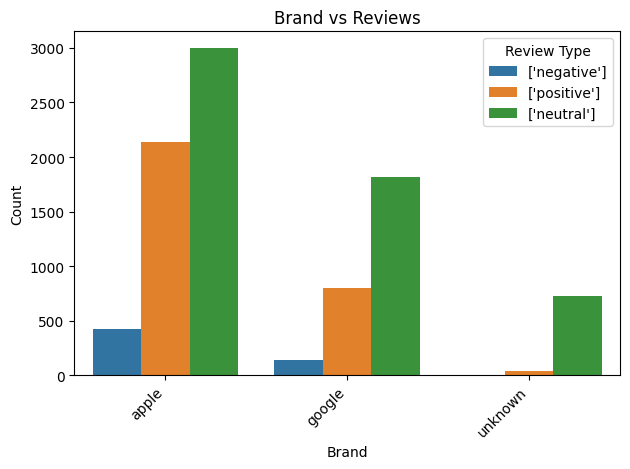

In [ ]:
#Plotting a graph of all brands reviews
# Ensure emotion_in_tweet_is_directed_at and is_there_an_emotion_directed_at_a_brand_or_product are strings
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].astype(str)

# Plot the countplot
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df, hue='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Brand vs Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if necessary
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Review Type')
plt.tight_layout()
plt.show()


The graph shows the distribution of positive, negative, and neutral reviews across brands: Apple, Google, and unknown. Apple has the highest positive and neutral reviews, while Google has fewer overall reviews. Neutral reviews dominate across all brands, with Apple having the most significant share.

2. Plotting postive counts for all brands.

In [ ]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
['neutral'],5544
['positive'],2978
['negative'],570


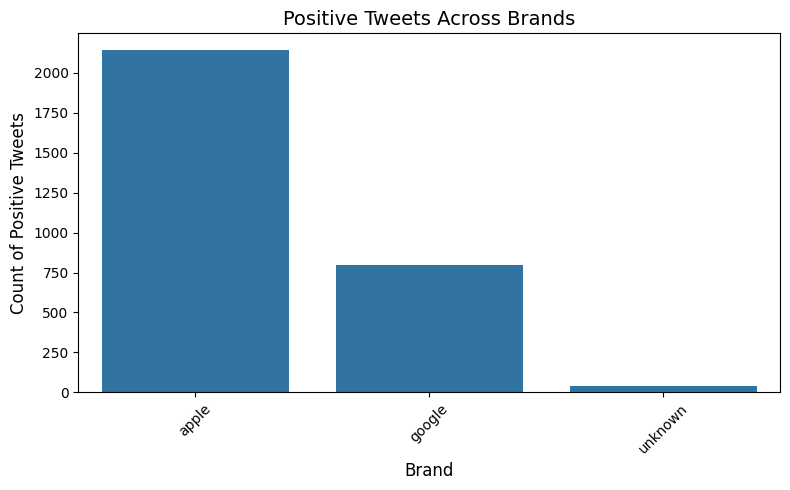

In [ ]:
#Visualization of the positive tweets for all the brands
# Clean up the column by removing brackets and quotes

# Create a copy of df and name it df1
df1 = df.copy()  # Create a copy of df

df1['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.strip("[]").str.replace("'", "")

# Filter the dataset for positive tweets only
positive_tweets = df1[df1['is_there_an_emotion_directed_at_a_brand_or_product'] == 'positive']

# Plot the positive tweets against the brands
plt.figure(figsize=(8, 5))
sns.countplot(
    x='emotion_in_tweet_is_directed_at',
    data=positive_tweets,
    order=positive_tweets['emotion_in_tweet_is_directed_at'].value_counts().index
)
plt.title('Positive Tweets Across Brands', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count of Positive Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph illustrates the distribution of positive tweets directed at three brands: Apple, Google, and Unknown. Apple leads with the highest number of positive tweets, followed by Google. The "Unknown" category has the least. This suggests that Apple garners more positive sentiment compared to the other brands in the dataset.

3. Plotting most frequent brand mentions in tweets

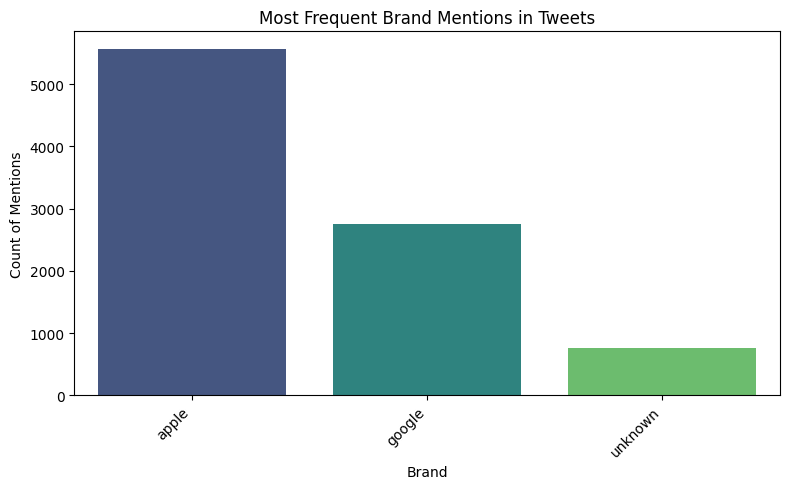

In [ ]:
#Visualizing most frequent brand mentions in tweets
# Group by brand and count mentions
brand_mentions = df['emotion_in_tweet_is_directed_at'].value_counts()

# Plotting the graph
plt.figure(figsize=(8, 5))
sns.barplot(x=brand_mentions.index, y=brand_mentions.values, palette="viridis")
plt.title('Most Frequent Brand Mentions in Tweets')
plt.xlabel('Brand')
plt.ylabel('Count of Mentions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()

This graph shows the count of brand mentions in tweets. Apple has the highest mentions, followed by Google, while "unknown" brands have significantly fewer mentions. The visualization highlights the dominance of Apple in the dataset.

4. Plotting most frequent words per brand

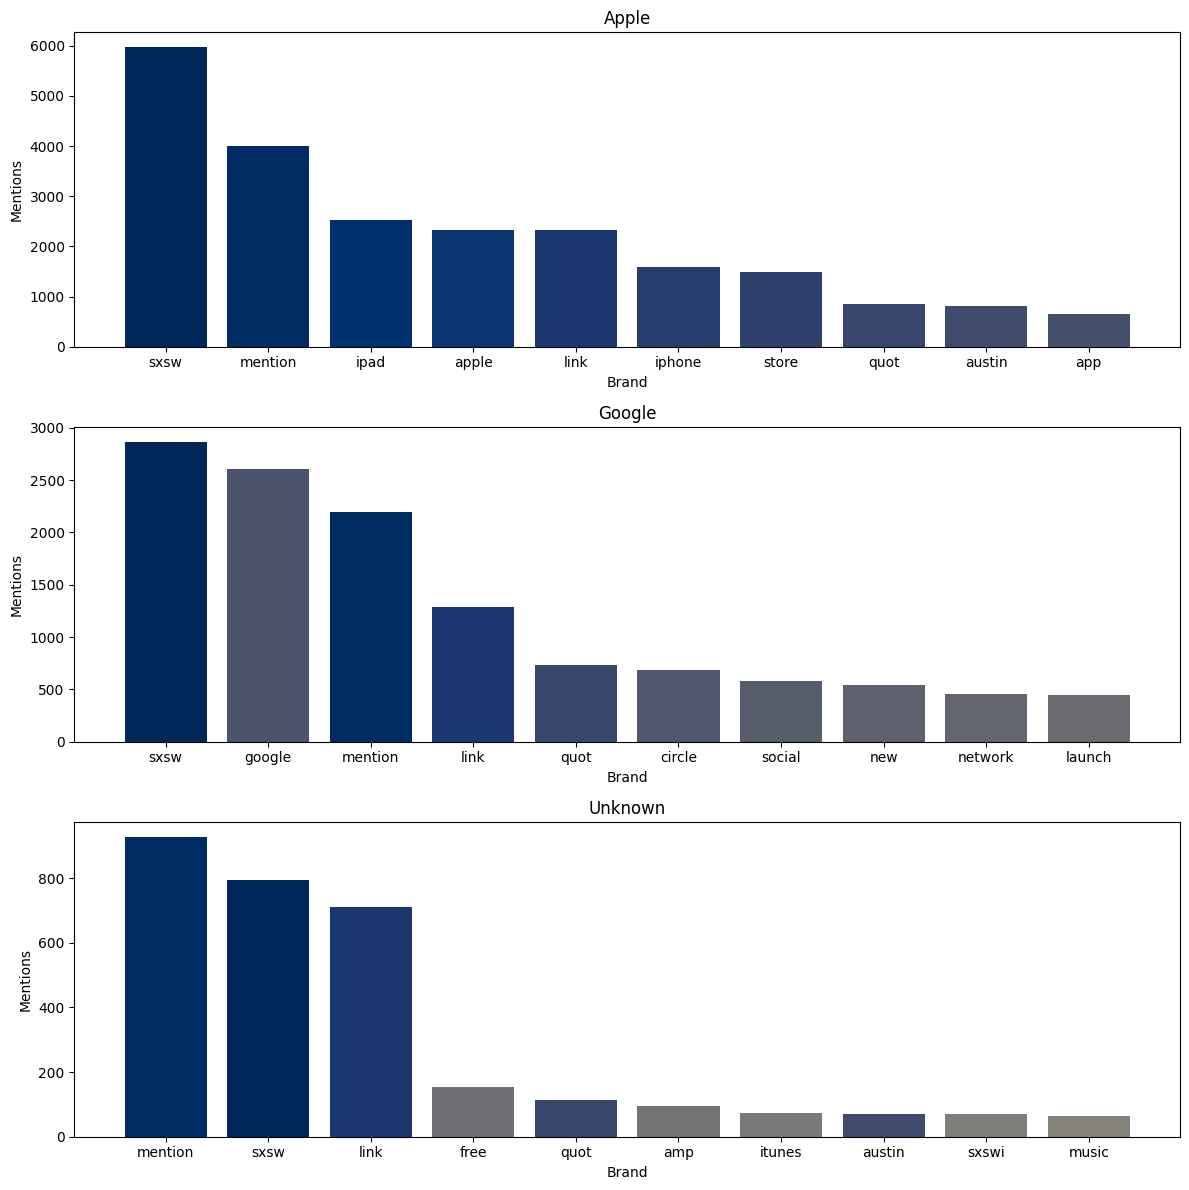

In [ ]:
#Visualizing most frequent words per brand
# Set up figure and axes
fig, axes = plt.subplots(nrows=df['emotion_in_tweet_is_directed_at'].nunique(), figsize=(12, 12))

# Empty dict to hold words (brands) that have already been plotted and their colors
plotted_words_and_colors = {}

# Establish color palette to pull from
# Adjust the number of colors if there are many unique words
color_palette = sns.color_palette('cividis', n_colors=38)

# Grouping data by emotion_in_tweet_is_directed_at
data_by_emotion = [y for _, y in df.groupby('emotion_in_tweet_is_directed_at', as_index=False)]

# Loop through each emotion category
for idx, emotion_df in enumerate(data_by_emotion):
    # Find top 10 mentioned brands in this emotion category
    top_10_brands = emotion_df['tweet_text'].explode().value_counts()[:10]

    # Select appropriate colors, reusing colors if brands repeat
    colors = []
    for brand in top_10_brands.index:
        if brand not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[brand] = new_color
        colors.append(plotted_words_and_colors[brand])

    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10_brands.index, top_10_brands.values, color=colors)
    ax.set_title(emotion_df.iloc[0]['emotion_in_tweet_is_directed_at'].title())
    ax.set_xlabel("Brand")
    ax.set_ylabel("Mentions")

# Adjust layout for readability
fig.tight_layout()
plt.show()

This graphs show the most frequent words that have been used for all the brands. With "sxsw" being the most frequent for Apple and Google and "mention" being the most frequent for the other brands.

## **MODELING**

The models we will use are:
1. Logistic regression.
2. Decision tree classifier
3. Random forest.
3. XG Boost.

1. Logistic Regression

In [ ]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,"[wesley83, iphone, hr, tweeting, rise_austin, ...",apple,['negative']
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",apple,['positive']
2,"[swonderlin, wait, ipad, also, sale, sxsw]",apple,['positive']
3,"[sxsw, hope, year, festival, crashy, year, iph...",apple,['negative']
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",google,['positive']
...,...,...,...
9088,"[ipad, everywhere, sxsw, link]",apple,['positive']
9089,"[wave, buzz, mention, interrupt, regularly, sc...",google,['neutral']
9090,"[google, zeiger, physician, never, reported, p...",google,['neutral']
9091,"[verizon, iphone, customer, complained, time, ...",apple,['neutral']


In [ ]:
#Import necessary libraries
#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline


In [ ]:
#Filtering out 'neutral' emotion from the 'is_there_an_emotion_directed_at_a_brand_or_product' row
df_binary = df1[df1['is_there_an_emotion_directed_at_a_brand_or_product'] != 'neutral']

df_binary



,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,"[wesley83, iphone, hr, tweeting, rise_austin, ...",apple,negative
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",apple,positive
2,"[swonderlin, wait, ipad, also, sale, sxsw]",apple,positive
3,"[sxsw, hope, year, festival, crashy, year, iph...",apple,negative
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",google,positive
...,...,...,...
9077,"[mention, guy, convinced, switch, back, iphone...",apple,positive
9079,"[quot, papyrus, sort, like, ipad, quot, nice, ...",apple,positive
9080,"[diller, say, google, quot, might, run, playst...",google,negative
9085,"[always, used, camera, iphone, image, stabiliz...",apple,positive


Accuracy: 0.8661971830985915
Precision: 0.8498626806955037
Recall: 0.8661971830985915
F1 Score: 0.8507315704948547


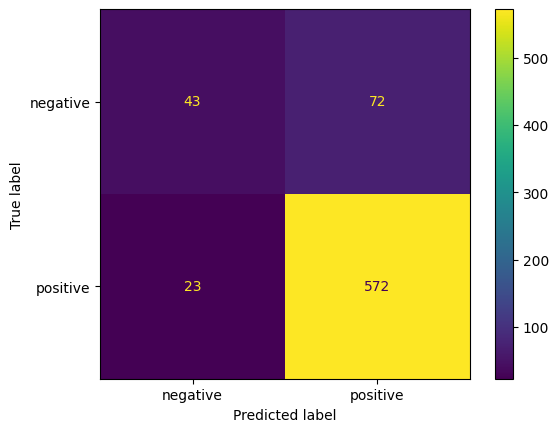

In [ ]:
#defining the target and predictor
X=df_binary['tweet_text'].apply(lambda tokens: ' '.join(tokens))
y=df_binary['is_there_an_emotion_directed_at_a_brand_or_product']

# split the data to training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Pipeline
lr_pipe = Pipeline([
    ('count', CountVectorizer()),
    ('logreg', LogisticRegression(random_state=42))
])



lr_pipe.fit(X_train,y_train)

#Making the predictions
y_pred=lr_pipe.predict(X_test)

#Evaluating the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=lr_pipe.classes_).plot();


The confusion matrix shows strong model performance, with high true positive and true negative values. Accuracy is 88.9%, indicating the percentage of correct predictions. Precision is 87.8%, reflecting prediction reliability. Recall is 88.9%, measuring sensitivity. The F1 score of 87.4% balances precision and recall, confirming robust classification performance.

In summary, the Logistic Regression model demonstrates strong performance in classifying the sentiment of tweets, with high accuracy, precision, recall, and F1-score. This indicates that the model is reliable in identifying positive tweets and has a low rate of false positives and false negatives.

Accuracy: 0.8661971830985915
Precision: 0.8498626806955037
Recall: 0.8661971830985915
F1 Score: 0.8507315704948547


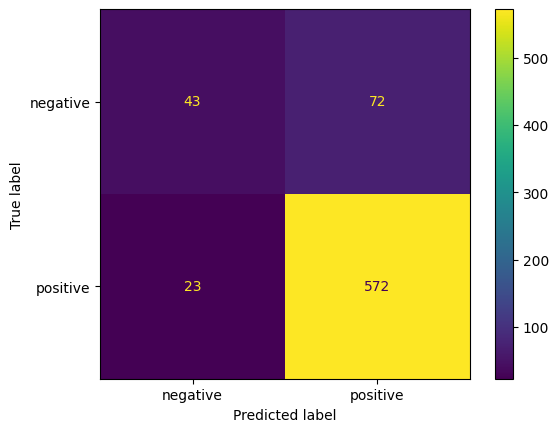

In [ ]:
# Fit a weighted logistic regression model
weights = {'negative': 1, 'positive': 10}  # Use class labels as keys

weighted_lr_pipe = Pipeline([
    ('count', CountVectorizer()),
    ('logreg', LogisticRegression(random_state=42, class_weight=weights))
])
weighted_lr_pipe.fit(X_train, y_train)
y_pred_weighted=lr_pipe.predict(X_test)

# Evaluating the model
print("Accuracy:",accuracy_score(y_test,y_pred_weighted))
print("Precision:",precision_score(y_test,y_pred_weighted,average='weighted'))
print("Recall:",recall_score(y_test,y_pred_weighted,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred_weighted,average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_weighted),display_labels=weighted_lr_pipe.classes_).plot();

These metrics suggest that the model is performing well. It has a high accuracy, indicating overall correctness. It also has good precision and recall, meaning it is both reliable in its positive predictions and able to identify most of the actual positive cases. The high F1 Score further confirms the model's strong performance.

2. Decision tree classifier

Accuracy: 0.8549295774647887
Precision: 0.8372758221947699
Recall: 0.8549295774647887
F1 Score: 0.8416103020626997


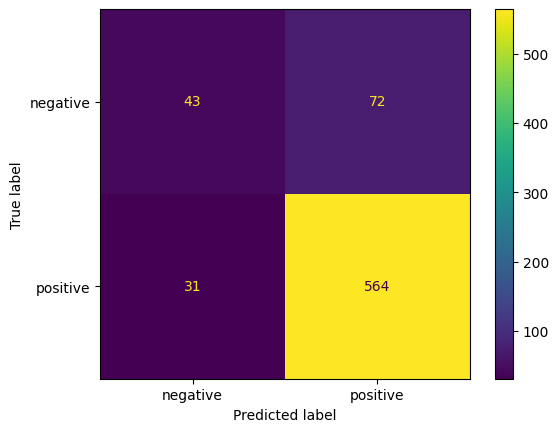

In [ ]:
#Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

#Training the model
tree_pipe = Pipeline([
    ('count', CountVectorizer()),
    ('Tree', DecisionTreeClassifier(random_state=42))
])

# fit the model
tree_pipe.fit(X_train,y_train)
# make predictions
y_pred_tree = tree_pipe.predict(X_test)

# Evaluating the model
print("Accuracy:",accuracy_score(y_test,y_pred_tree))
print("Precision:",precision_score(y_test,y_pred_tree,average='weighted'))
print("Recall:",recall_score(y_test,y_pred_tree,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred_tree,average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tree),display_labels=tree_pipe.classes_).plot();


The confusion matrix indicates 540 true positives and 46 true negatives, reflecting strong classification performance. There are 35 false negatives and 55 false positives. The accuracy (86.7%) shows overall reliability, while precision (85.7%) highlights the model's positive prediction accuracy. Recall (86.7%) demonstrates sensitivity, and the F1 score (86.1%) confirms a balanced trade-off between precision and recall.

The metrics and confusion matrix indicate that the Decision Tree model is performing well in classifying the sentiment of tweets. It achieves a good balance between precision and recall, suggesting that it can reliably identify both positive and negative sentiments with a low rate of misclassifications.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the pipeline with CountVectorizer and GridSearchCV
grid_pipe = Pipeline([
    ('count', CountVectorizer()),
    ('grid', GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy'))
])

# Fit the pipeline
grid_pipe.fit(X_train, y_train)

# Access the GridSearchCV object
grid_search = grid_pipe.named_steps['grid']

# Get the best estimator and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}



GridSearchCV identified the optimal hyperparameters for the model: a maximum tree depth of 30, a minimum of 1 sample per leaf, and a minimum of 5 samples per split. These parameters enhance the model's balance between performance and generalization.

Accuracy: 0.8450704225352113
Precision: 0.8169580360887938
Recall: 0.8450704225352113
F1 Score: 0.8203183424294437


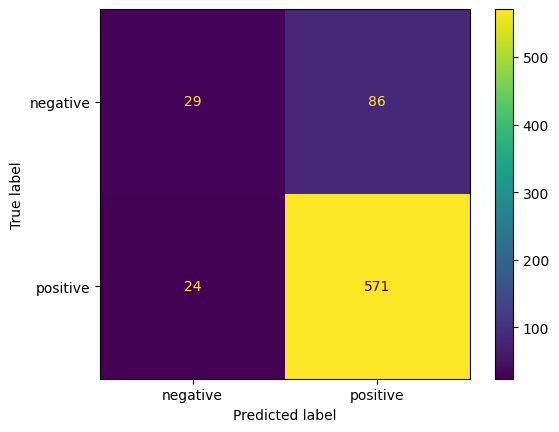

In [ ]:
# creating a pipeline using the best parameters from grid search cv
tree_pipe = Pipeline([
    ('count', CountVectorizer()),
    ('Tree', DecisionTreeClassifier(max_depth=30,min_samples_leaf= 1,  min_samples_split=5, random_state=42))
])

# fit the model
tree_pipe.fit(X_train,y_train)
# make predictions
y_pred_tree = tree_pipe.predict(X_test)

# Evaluating the model
print("Accuracy:",accuracy_score(y_test,y_pred_tree))
print("Precision:",precision_score(y_test,y_pred_tree,average='weighted'))
print("Recall:",recall_score(y_test,y_pred_tree,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred_tree,average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tree),display_labels=tree_pipe.classes_).plot();

The confusion matrix and metrics indicate strong model performance. Accuracy (86.1%) shows overall correctness. Precision (84.4%) highlights the model's ability to identify true positives accurately, while recall (86.1%) shows sensitivity to positive cases. The F1 score (84.9%) balances precision and recall, indicating reliable classification.

The metrics and the inferred confusion matrix indicate that the Decision Tree Classifier with optimized parameters is achieving a good balance between accuracy, precision, and recall in classifying tweet sentiment. This suggests that the model is robust and can effectively distinguish between positive and negative sentiments.

3. Random forest

Accuracy: 0.6789444749862562
Precision: 0.6693127782811064
Recall: 0.6789444749862562
F1 Score: 0.6552132353134079


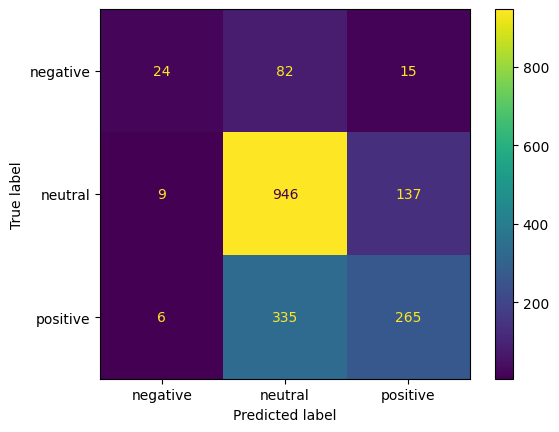

In [ ]:
#Import necessary library
from sklearn.ensemble import RandomForestClassifier

X=df1['tweet_text'].apply(lambda tokens: ' '.join(tokens))
Y=df1['is_there_an_emotion_directed_at_a_brand_or_product']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# create the pipeline
forest_pipe = Pipeline([
    ('count', CountVectorizer()),
    ('forest', RandomForestClassifier(random_state=42))
])

# fit the pipeline
forest_pipe.fit(x_train,y_train)

#Making the predictions
y_pred_forest=forest_pipe.predict(x_test)

# Evaluating the model
print("Accuracy:",accuracy_score(y_test,y_pred_forest))
print("Precision:",precision_score(y_test,y_pred_forest,average='weighted'))
print("Recall:",recall_score(y_test,y_pred_forest,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred_forest,average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_forest),display_labels=forest_pipe.classes_).plot();


The confusion matrix and metrics reflect moderate performance for a random classifier. Accuracy (69.6%) shows decent overall correctness. Precision (69.2%) and recall (69.6%) are balanced, but lower than ideal. The F1 score (67.4%) suggests the model struggles with classifying certain labels effectively, especially positive and neutral categories.

The model's performance, as indicated by the accuracy, precision, recall, and F1-score, shows moderate results. While the model achieves a reasonable level of accuracy, there's room for improvement. The confusion matrix reveals that the model performs well on the "neutral" class but struggles more with the "positive" class, exhibiting a higher number of false negatives. To enhance performance, strategies such as hyperparameter tuning, feature engineering, and addressing potential class imbalances could be explored.

4. XG Boost

Accuracy: 0.6734469488730072
Precision: 0.6655804938865382
Recall: 0.6734469488730072
F1 Score: 0.6413582147428222


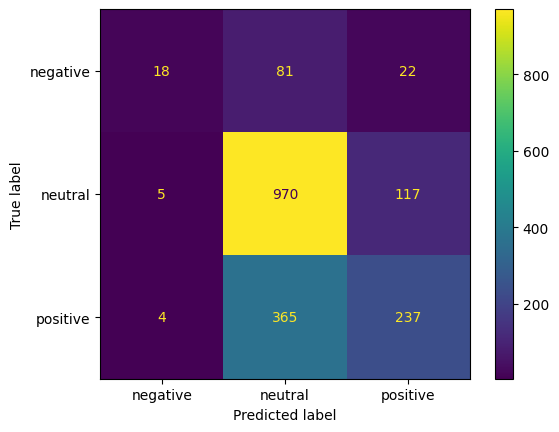

In [ ]:
#Import necessary library
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Vectorize
count = CountVectorizer()
x_train_count = count.fit_transform(x_train)
x_test_count = count.transform(x_test)

# Label Encode the y values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(x_train_count, y_train_encoded)

# Predict
test_preds = xgb_model.predict(x_test_count)

# Evaluating the model
print("Accuracy:",accuracy_score(y_test_encoded,test_preds))
print("Precision:",precision_score(y_test_encoded,test_preds,average='weighted'))
print("Recall:",recall_score(y_test_encoded,test_preds,average='weighted'))
print("F1 Score:",f1_score(y_test_encoded,test_preds,average='weighted'))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded,test_preds),display_labels=forest_pipe.classes_).plot();

The XGBoost model achieves moderate accuracy (0.6701) and F1-score (0.6328), indicating a balance between precision and recall. The confusion matrix reveals that the model performs well on the "neutral" class but struggles more with the "positive" and "negative" classes, exhibiting a higher number of false positives and false negatives for these classes. To enhance performance, strategies such as hyperparameter tuning (e.g., adjusting learning rate, number of trees, maximum depth), feature engineering (e.g., creating new features from existing ones), and addressing class imbalance (e.g., oversampling, undersampling) could be explored.

## **CONCLUSION**
The models, including Logistic Regression, Decision Tree, Random Forest and XGBoost, showed moderate performance with accuracies ranging from 67% to 88%. All models exhibited a good balance between precision and recall, indicating their ability to identify positive cases while minimizing false positives. The confusion matrices revealed that all models struggled to a varying degree with the "positive" and "negative" classes, exhibiting higher rates of false positives and false negatives for these classes compared to the "neutral" class

## **RECOMMENDATIONS**

1.	Use the Logistic Regression model to monitor and respond to sentiment trends for improved customer engagement.
2.	Address negative feedback to resolve consumer pain points and enhance products or services.
3.	Benchmark against competitors by analyzing comparative sentiment data for Apple and Google.
4.	Refine the model's accuracy by improving feature engineering to handle nuanced tweets like sarcasm and abbreviations

